# DL Project

## Data

## Crop Classification in Cyprus - Advancing Sustainable Agriculture through Precision

This notebook will contain a descriptive analysis and a dummy implementation of crop classification in Cyprus based on the provided earth observation data. The goal is to create a mock example that serves as a baseline. Participants can then improve this baseline by experimenting with data preprocessing, model architecture, and data fusion with other sources, such as street-level imagery.

So for this notebook, the plan is to:
* Perform a brief exploratory analysis of the dataset.
* Utilize data exclusively from Sentinel-2 and Sentinel-1.
* Implement a baseline machine learning methodology using **Random Forest**.
* Visualize and interpret results with the aid of **street-level images**.

*Before running this notebook, please ensure that you have downloaded and stored the necessary data files.*

### Python libraries used
The libraries that we will need are the following:
* **`pandas`** to efficiently handle the input csv files as a dataframe
* **`numpy`** to perform the necessary processing using numpy arrays
* **`matplotlib.pyplot`** ,**`seaborn`** and **`pandas_bokeh`** for fancy plotting
* **`geopandas`** to process the geospatial information
* **`contextily`** for basemap import
* **`sklearn`** to run and evaluate all the data preprocessing routines and ML methodologies
* **`warnings`** to ignore any unnecessary future warning

#### IMPORT LIBRARIES ####

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import contextily as cx

# import pandas_bokeh
# pandas_bokeh.output_notebook()

# # import warnings filter
# # ignore all future warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

### Dataset Descriptive Analysis ###

#### Dataset Import

In [3]:
df_meta = pd.read_csv('./nasa_data/meta/cyprus_2022_meta.csv')
print(df_meta.shape)
df_meta.head()

(4277, 11)


ID                        FIELD_ID  APPLICANT_ID  CROP_CODE CROP_NAME  \
0   1  01014-3101-/2-288-375-11-473-1          1014        3.0     WHEAT   
1   2  01014-3101-/2-288-375-11-507-1          1014        3.0     WHEAT   
2   3  01014-3101-/2-288-375-11-508-1          1014        3.0     WHEAT   
3   4  01014-3101-/2-289-375-11-509-1          1014        3.0     WHEAT   
4   5       01025-3101-33/55E2--789-2          1025        8.0  POTATOES   

       CROP_FAMILY         AREA  N_PIXELS DATASET  N_IMAGES  \
0           CEREAL  1165.158305        20   TRAIN         2   
1           CEREAL  4545.289693        10   TRAIN         4   
2           CEREAL  2323.748449        20   TRAIN         3   
3           CEREAL  1471.295178        20   TRAIN         2   
4  BROADLEAF CROPS  8189.480106        20   TRAIN         2   

                                 STREET_LEVEL_IMAGES  
0             ['550954009799519', '163131462849398']  
1  ['574767340699898', '808899540093076', '690113...  
2  ['749294869551510', '180587380975671', '757371...  
3             ['502164218257808', '716572983012265']  
4             ['762920785018564', '621126086242482']

#### Explonatory Analysis

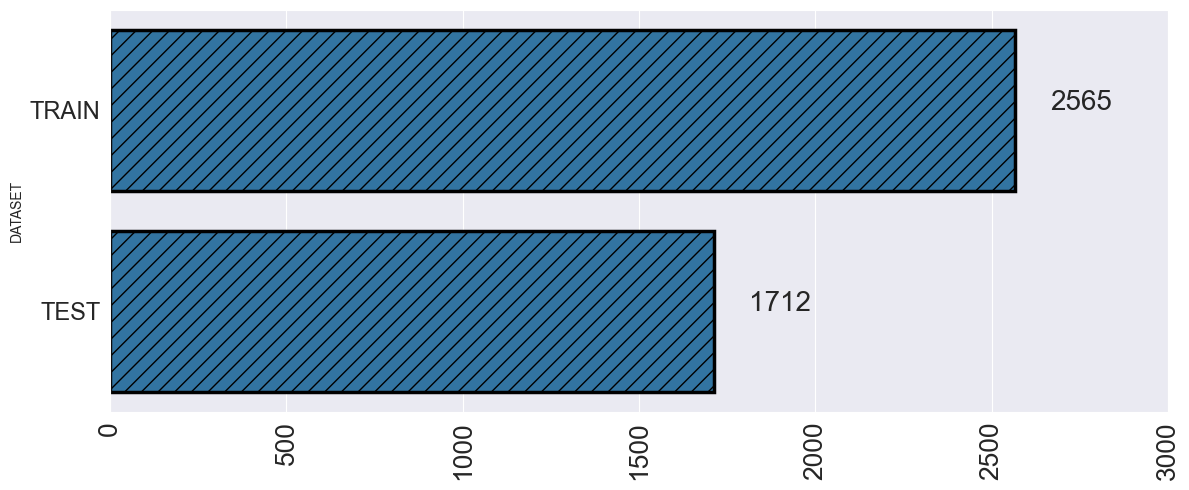

In [4]:
# d_count = df_meta.DATASET.value_counts().copy()
d_count = df_meta['DATASET'].value_counts().copy()


fig, ax = plt.subplots(figsize=(12,5))

ax_1 = sns.barplot(x=d_count.values,y=d_count.index,ax=ax,edgecolor="black", linewidth=2.5,hatch='//')
ax.set_title('',size=28)
ax.tick_params(axis='both', which='major', labelsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+100, p.get_y()+0.4),
                         size=20, rotation = 0)
ax.set_xlim(0,3000)


ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=90,size=19)
plt.tight_layout()
plt.show()

In [5]:
print(df_meta.columns)

Index(['ID', 'FIELD_ID', 'APPLICANT_ID', 'CROP_CODE', 'CROP_NAME',
       'CROP_FAMILY', 'AREA', 'N_PIXELS', 'DATASET', 'N_IMAGES',
       'STREET_LEVEL_IMAGES'],
      dtype='object')


In [6]:
## Fill NaN values
df_meta.CROP_NAME.fillna('TEST',inplace=True)
df_meta.CROP_CODE.fillna(0,inplace=True)

In [7]:
## import shapefile (geospatial vector data analysis)
dbf_meta = gpd.GeoDataFrame.from_file(filename='./nasa_data/meta/cyprus_2022_meta.shp',driver='ESRI Shapefile')
print(dbf_meta.shape)
dbf_meta.head()

(4277, 8)


ID                        FIELD_ID APPLICANT_  CROP_CODE CROP_NAME  \
0   1  01014-3101-/2-288-375-11-473-1      01014        3.0     WHEAT   
1   2  01014-3101-/2-288-375-11-507-1      01014        3.0     WHEAT   
2   3  01014-3101-/2-288-375-11-508-1      01014        3.0     WHEAT   
3   4  01014-3101-/2-289-375-11-509-1      01014        3.0     WHEAT   
4   5       01025-3101-33/55E2--789-2      01025        8.0  POTATOES   

        CROP_FAMIL         AREA  \
0           CEREAL  1165.158305   
1           CEREAL  4545.289693   
2           CEREAL  2323.748449   
3           CEREAL  1471.295178   
4  BROADLEAF CROPS  8189.480106   

                                            geometry  
0  POLYGON ((3781889.714 4164450.343, 3781890.735...  
1  POLYGON ((3781942.116 4164424.232, 3781942.183...  
2  POLYGON ((3782031.106 4164406.033, 3782039.856...  
3  POLYGON ((3782094.923 4164394.288, 3782095.871...  
4  POLYGON ((3787404.962 4168881.273, 3787441.298...

In [8]:
## fill NaN values
dbf_meta.CROP_NAME.fillna('TEST',inplace=True)
dbf_meta.CROP_CODE.fillna(0,inplace=True)

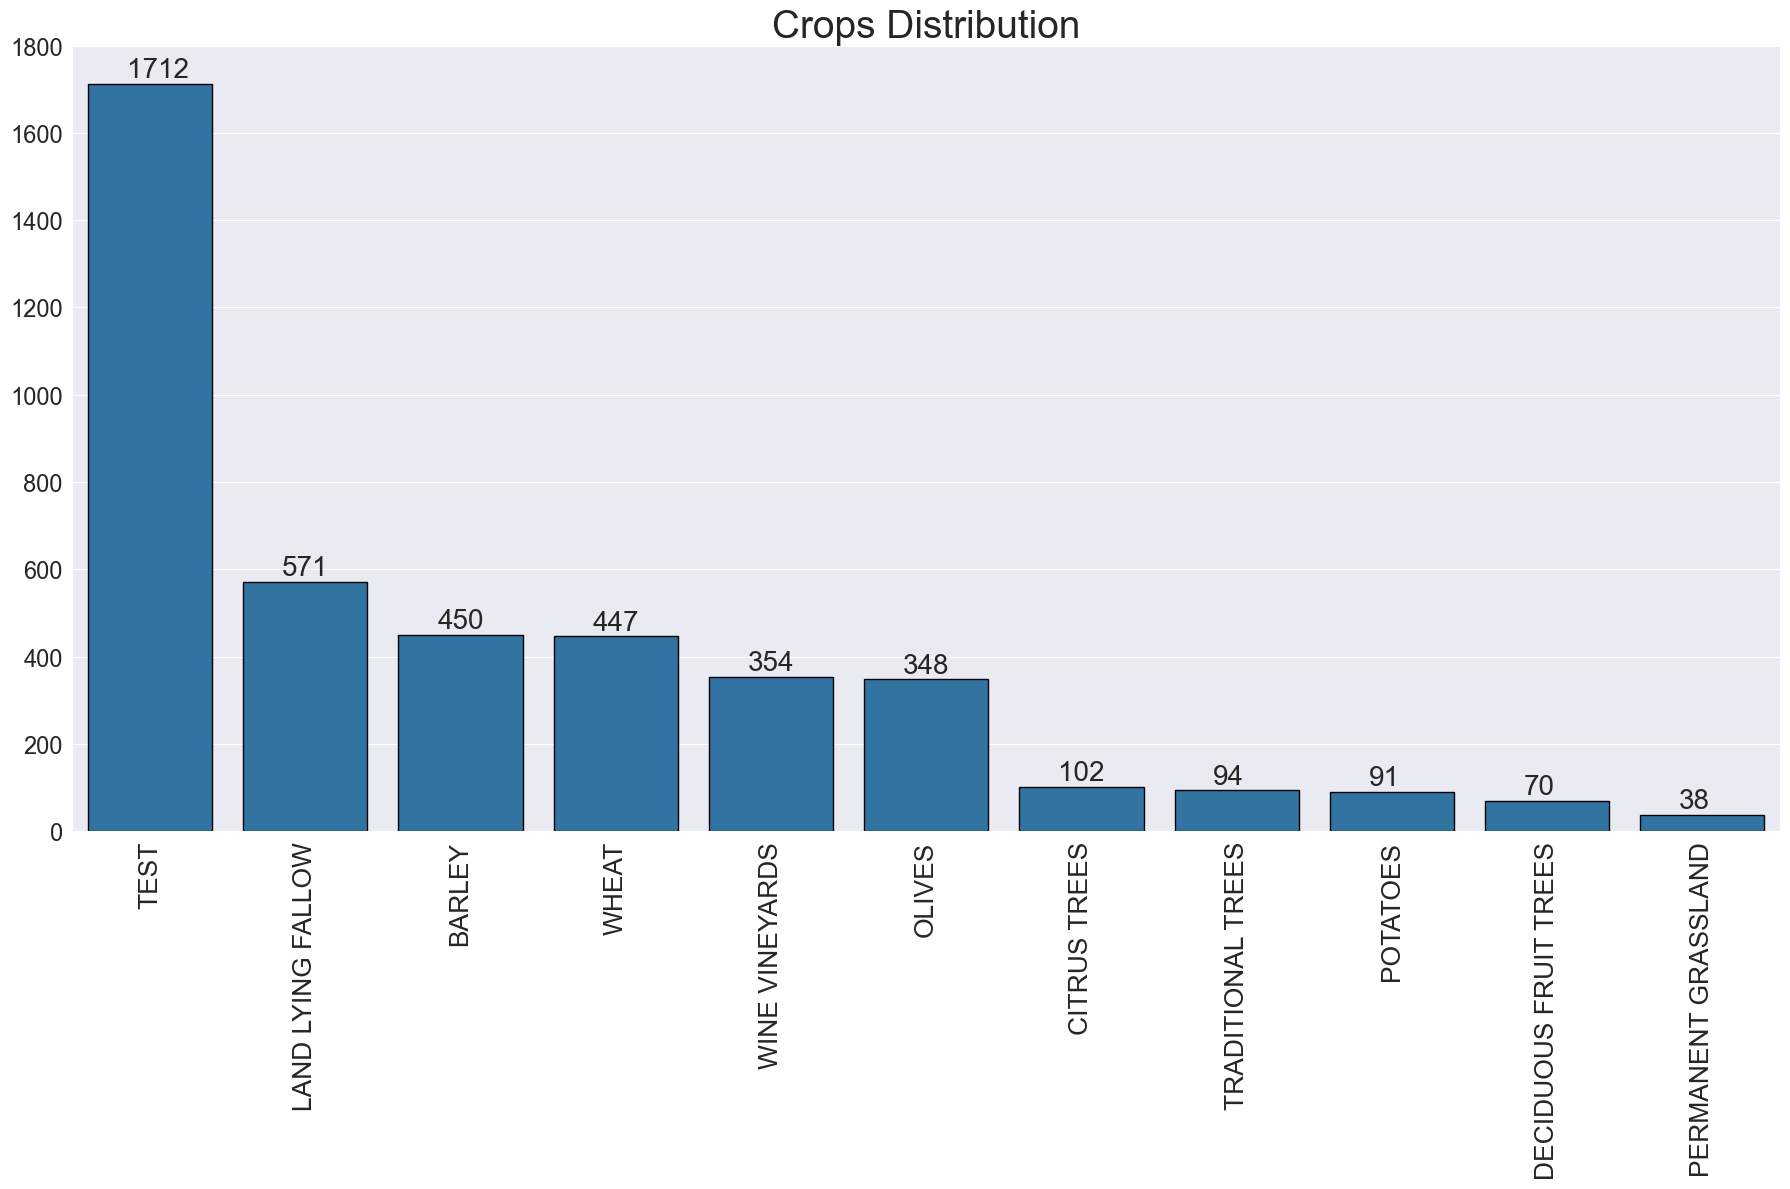

In [9]:
fig, ax = plt.subplots(figsize=(18, 12))

ax_1 = sns.countplot(x='CROP_NAME', data=dbf_meta, order = dbf_meta['CROP_NAME'].value_counts().index,
                     ax=ax,edgecolor="black", linewidth=1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Crops Distribution',size=28)
ax.tick_params(axis='y', which='major', labelsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+15),
                         size=20, rotation = 0)
ax.set_ylim(0,1800)


ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=90,size=19)
plt.tight_layout()
plt.show()

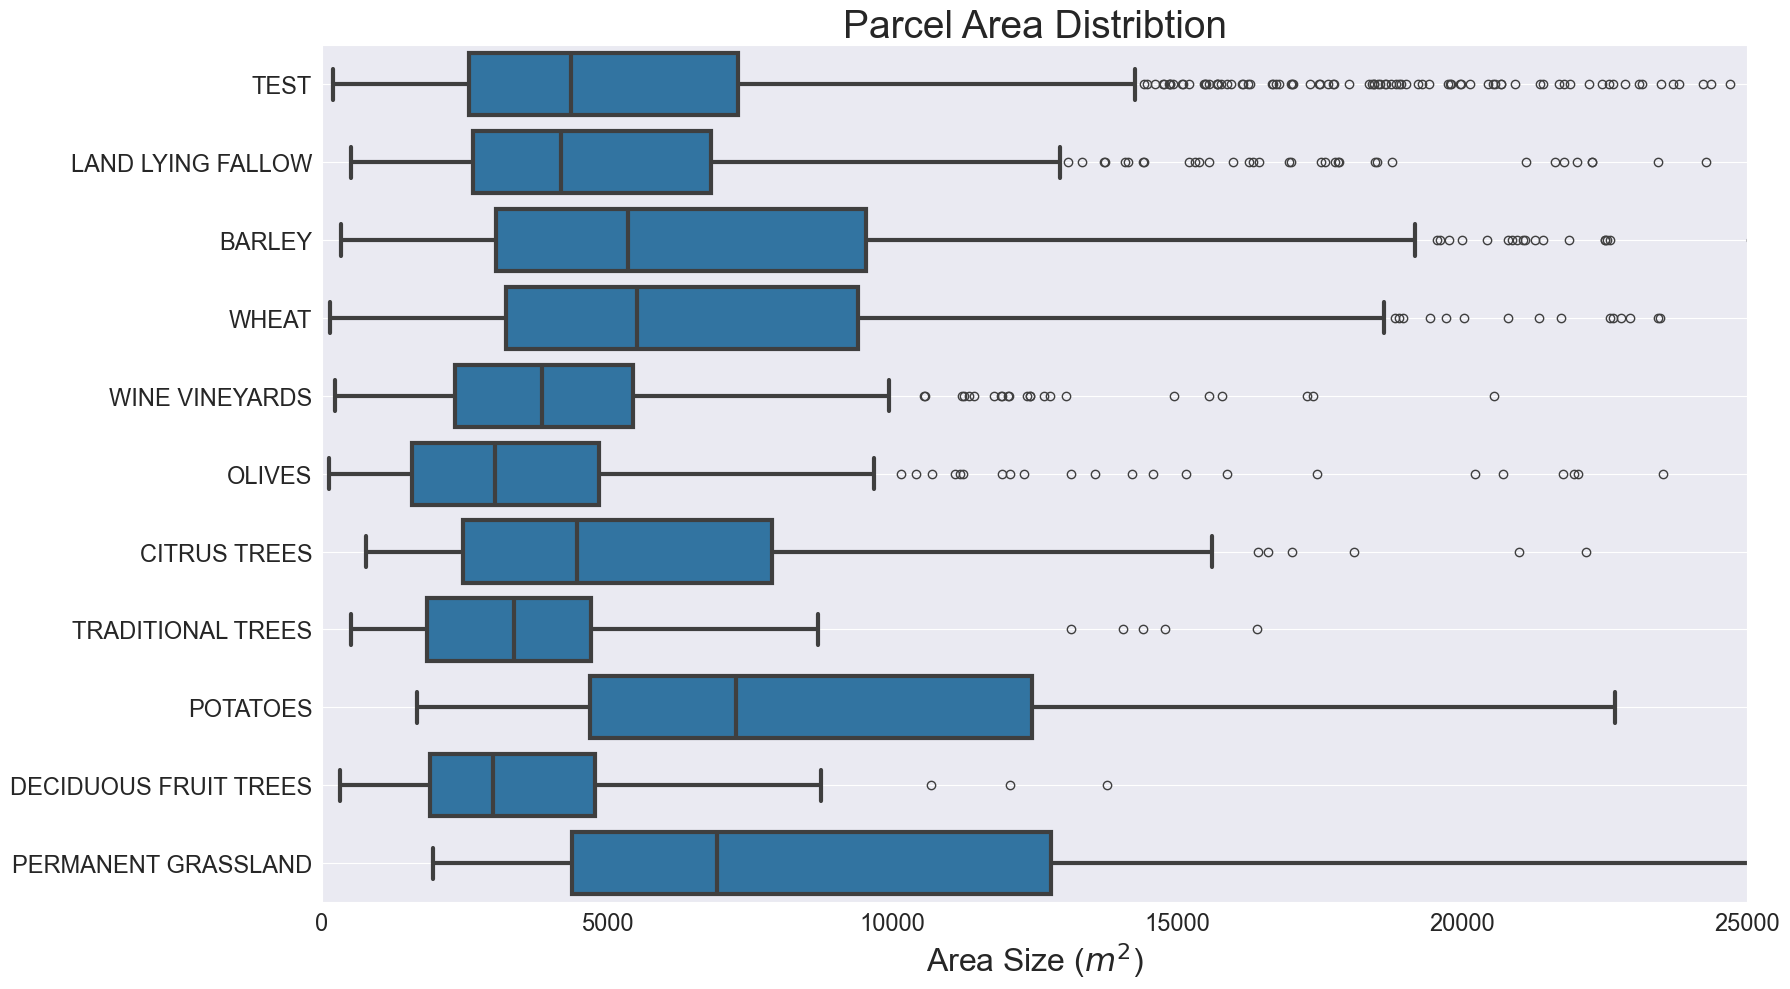

In [10]:
fig = plt.figure(figsize=(18,10))
ax = sns.boxplot(x='AREA',y='CROP_NAME',data=dbf_meta,order = dbf_meta['CROP_NAME'].value_counts().index,linewidth=3)
plt.title('Parcel Area Distribtion',fontsize=28)
plt.xlim(0,25000)
plt.xlabel('Area Size ($m^2$)',fontsize=23)
plt.ylabel('')
plt.tick_params(axis='both', which='major', labelsize=17)
plt.grid()
plt.tight_layout()
plt.show()

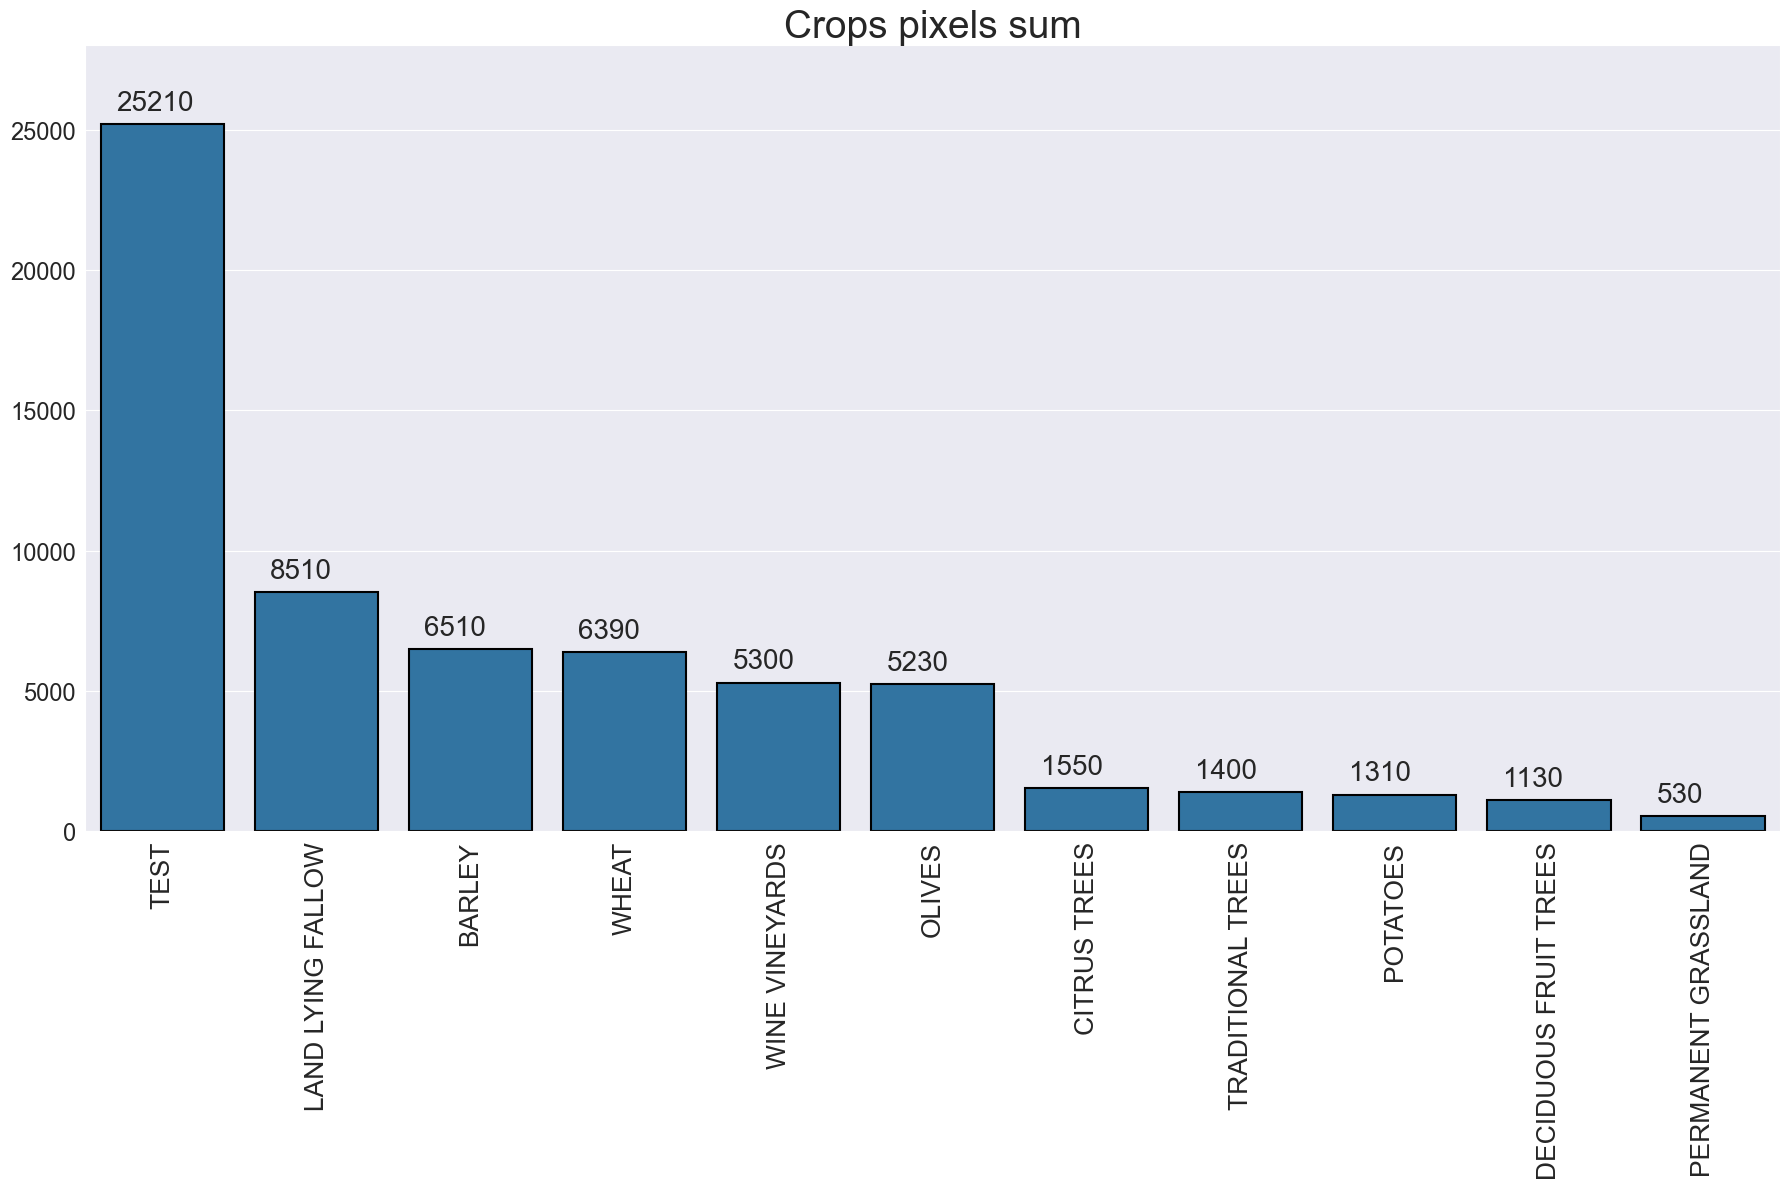

In [11]:
d_count = df_meta.groupby('CROP_NAME').sum()['N_PIXELS'].sort_values(ascending=False).copy()

fig, ax = plt.subplots(figsize=(18, 12))

ax_1 = sns.barplot(y=d_count.values,x=d_count.index,ax=ax,edgecolor="black", linewidth=1.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Crops pixels sum',size=28)
ax.tick_params(axis='y', which='major', labelsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500),
                         size=20, rotation = 0)
ax.set_ylim(0,28000)


ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=90,size=19)
plt.tight_layout()
plt.show()

#### Fields plotting ####

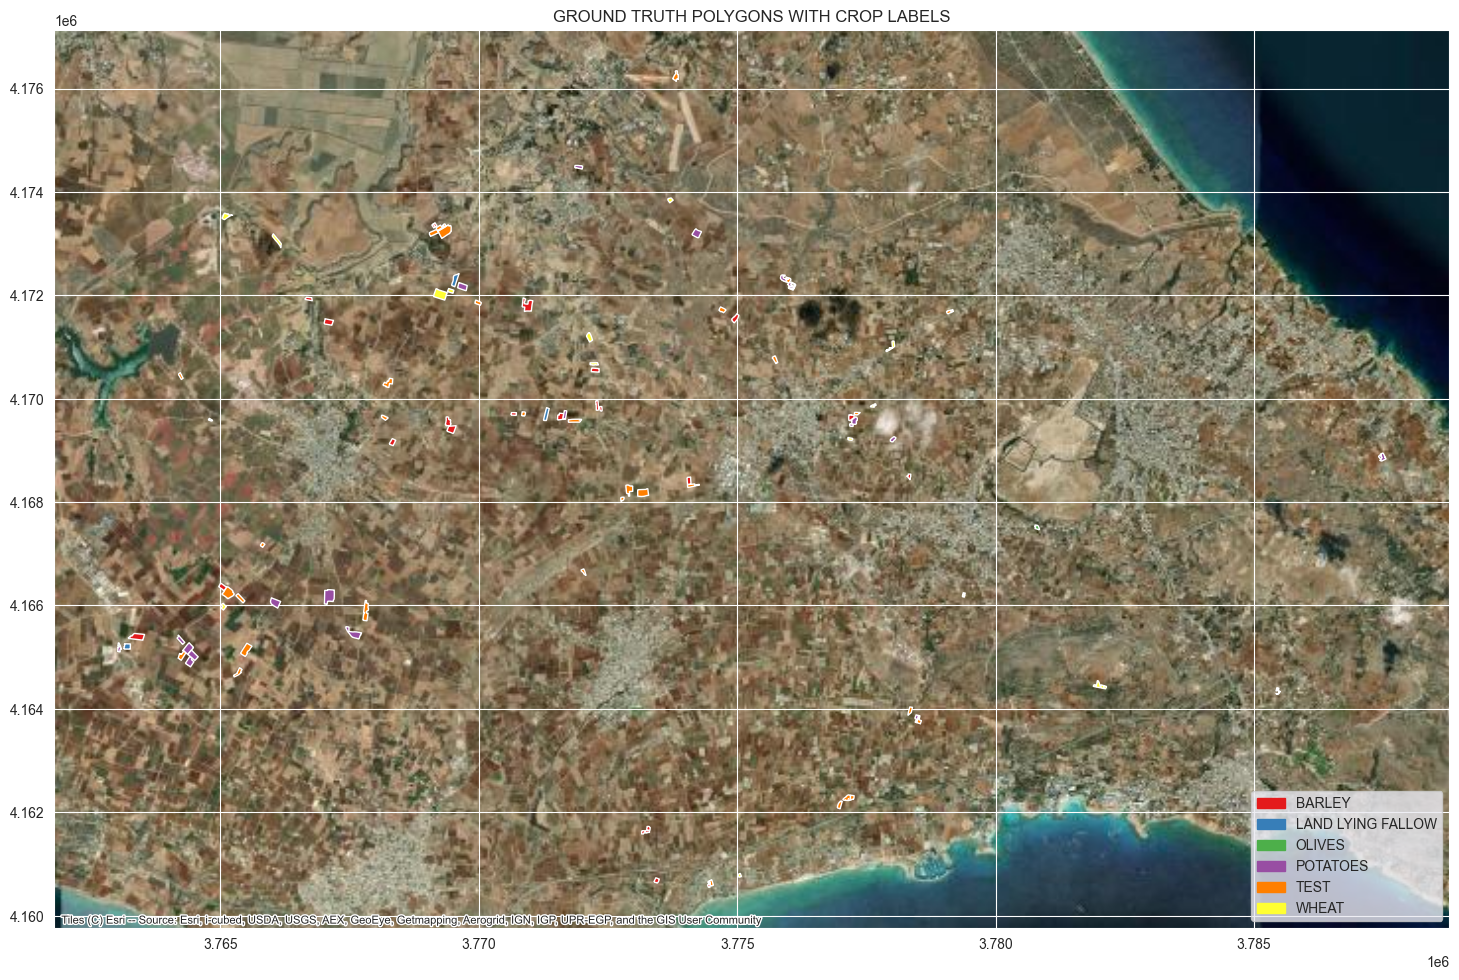

In [12]:
dbf_meta_sample = dbf_meta.iloc[:100].copy()

colors_list = sns.color_palette('Set1',dbf_meta_sample.CROP_NAME.unique().shape[0])

fig, axes = plt.subplots(1,1, figsize=(18, 18))
counter=0
legend_elements = []
for group_1 in dbf_meta_sample[dbf_meta_sample['CROP_NAME'].isin(dbf_meta_sample['CROP_NAME'].value_counts()[:len(colors_list)].index)].groupby('CROP_NAME'):

    group_1[1].plot(ax=axes,color=colors_list[counter],aspect=1)

    legend_elements.append(Patch(facecolor=colors_list[counter], edgecolor=colors_list[counter],label=group_1[0]))
    counter+=1

cx.add_basemap(axes,source=cx.providers.Esri.WorldImagery)
axes.legend(handles=legend_elements,loc='lower right')
axes.title.set_text('GROUND TRUTH POLYGONS WITH CROP LABELS')

In [14]:
import hvplot.pandas  # registers .hvplot on DataFrame/GeoDataFrame

dbf_meta_sample.hvplot(
    geo=True,
    tile_provider="ESRI.Imagery",
    frame_width=900,
    frame_height=600,
    c="CROP_CODE",
    cmap="Viridis",
    hover_cols=list(dbf_meta_sample.columns),
    alpha=0.6,
)

:Polygons   [Longitude,Latitude]   (CROP_CODE,ID,FIELD_ID,APPLICANT_,CROP_NAME,CROP_FAMIL,AREA)

In [15]:
print(dbf_meta_sample.crs)
#> {'init': 'epsg:4326'}  # WGS84 longitude/latitude

EPSG:3857


#### Sentinel Feature Space Import

In [16]:
df_sentinel = pd.read_csv('./nasa_data/fs_sentinel_cyprus_2022_buffer5_interp.csv')
print(df_sentinel.shape)
df_sentinel.head()

(63070, 602)


PIXEL_ID                        FIELD_ID  \
0  01014-3101-/2-288-375-11-473-1_1  01014-3101-/2-288-375-11-473-1   
1  01014-3101-/2-288-375-11-473-1_2  01014-3101-/2-288-375-11-473-1   
2  01014-3101-/2-288-375-11-473-1_3  01014-3101-/2-288-375-11-473-1   
3  01014-3101-/2-288-375-11-473-1_4  01014-3101-/2-288-375-11-473-1   
4  01014-3101-/2-288-375-11-473-1_5  01014-3101-/2-288-375-11-473-1   

   2021-11-01_B02  2021-11-06_B02  2021-11-11_B02  2021-11-16_B02  \
0          1001.5          1008.5           919.0           830.0   
1           871.5           785.5           781.5           777.5   
2           871.5           785.5           781.5           777.5   
3           871.5           785.5           781.5           777.5   
4           871.5           785.5           781.5           777.5   

   2021-11-21_B02  2021-11-26_B02  2021-12-01_B02  2021-12-06_B02  ...  \
0           740.5           641.5           527.5           413.5  ...   
1           773.5           710.5           559.5           408.5  ...   
2           773.5           710.5           559.5           408.5  ...   
3           773.5           710.5           559.5           408.5  ...   
4           773.5           710.5           559.5           408.5  ...   

   2022-03-31_VH  2022-04-05_VH  2022-04-10_VH  2022-04-15_VH  2022-04-20_VH  \
0     -15.781250     -15.781250     -15.781250     -15.781250     -15.781250   
1     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312   
2     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312   
3     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312   
4     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312   

   2022-04-25_VH  2022-04-30_VH  2022-05-05_VH  2022-05-10_VH  2022-05-15_VH  
0     -15.781250     -15.781250     -15.781250     -15.781250     -15.781250  
1     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312  
2     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312  
3     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312  
4     -15.570312     -15.570312     -15.570312     -15.570312     -15.570312  

[5 rows x 602 columns]

In [17]:
## Sentinel Bands and Vegetation Indices (VIs)
bands = np.array([c.split('_')[1] for c in df_sentinel.filter(regex='2021-11-01',axis=1).columns])
## Dates of Information
dates = np.array([c.split('_')[0] for c in df_sentinel.filter(regex='B02',axis=1).columns])

In [18]:
print(bands)

['B02' 'B03' 'B04' 'B05' 'B06' 'B07' 'B08' 'B8A' 'B11' 'B12' 'NDVI' 'NDWI'
 'PSRI' 'VV' 'VH']


In [19]:
print(dates)

['2021-11-01' '2021-11-06' '2021-11-11' '2021-11-16' '2021-11-21'
 '2021-11-26' '2021-12-01' '2021-12-06' '2021-12-11' '2021-12-16'
 '2021-12-21' '2021-12-26' '2021-12-31' '2022-01-05' '2022-01-10'
 '2022-01-15' '2022-01-20' '2022-01-25' '2022-01-30' '2022-02-04'
 '2022-02-09' '2022-02-14' '2022-02-19' '2022-02-24' '2022-03-01'
 '2022-03-06' '2022-03-11' '2022-03-16' '2022-03-21' '2022-03-26'
 '2022-03-31' '2022-04-05' '2022-04-10' '2022-04-15' '2022-04-20'
 '2022-04-25' '2022-04-30' '2022-05-05' '2022-05-10' '2022-05-15']


In [20]:
## These dictionaries are useful for quickly looking up and matching information
index_to_field_id = {k:v for k,v in df_meta[['ID','FIELD_ID']].values}
field_id_to_index = {k:v for k,v in df_meta[['FIELD_ID','ID']].values}
id_to_code = {k:v for k,v in df_meta[['FIELD_ID','CROP_CODE']].values}
id_to_name = {k:v for k,v in df_meta[['FIELD_ID','CROP_NAME']].values}
id_to_family = {k:v for k,v in df_meta[['FIELD_ID','CROP_FAMILY']].values}
code_to_name = {k:v for k,v in df_meta[['CROP_CODE','CROP_NAME']].values}

### Bands and VIs signatures ###

VIs signatures of different crops refer to the unique patterns or characteristics of vegetion indices values exhibited by various types of crops when observed over time.

NDVI is a commonly used remote sensing index that quantifies vegetation health and density based on the reflectance of near-infrared (B08) and red light (B04).

      NDVI = (B08 - B04) / (B08 + B04)

NDWI is a remote sensing index that quantifies the presence and concentration of water in the landscape by leveraging the difference in reflectance between the near-infrared (B08) and shortwave infrared (B03) bands.

      NDWI = (B03 - B08) / (B03 + B08)

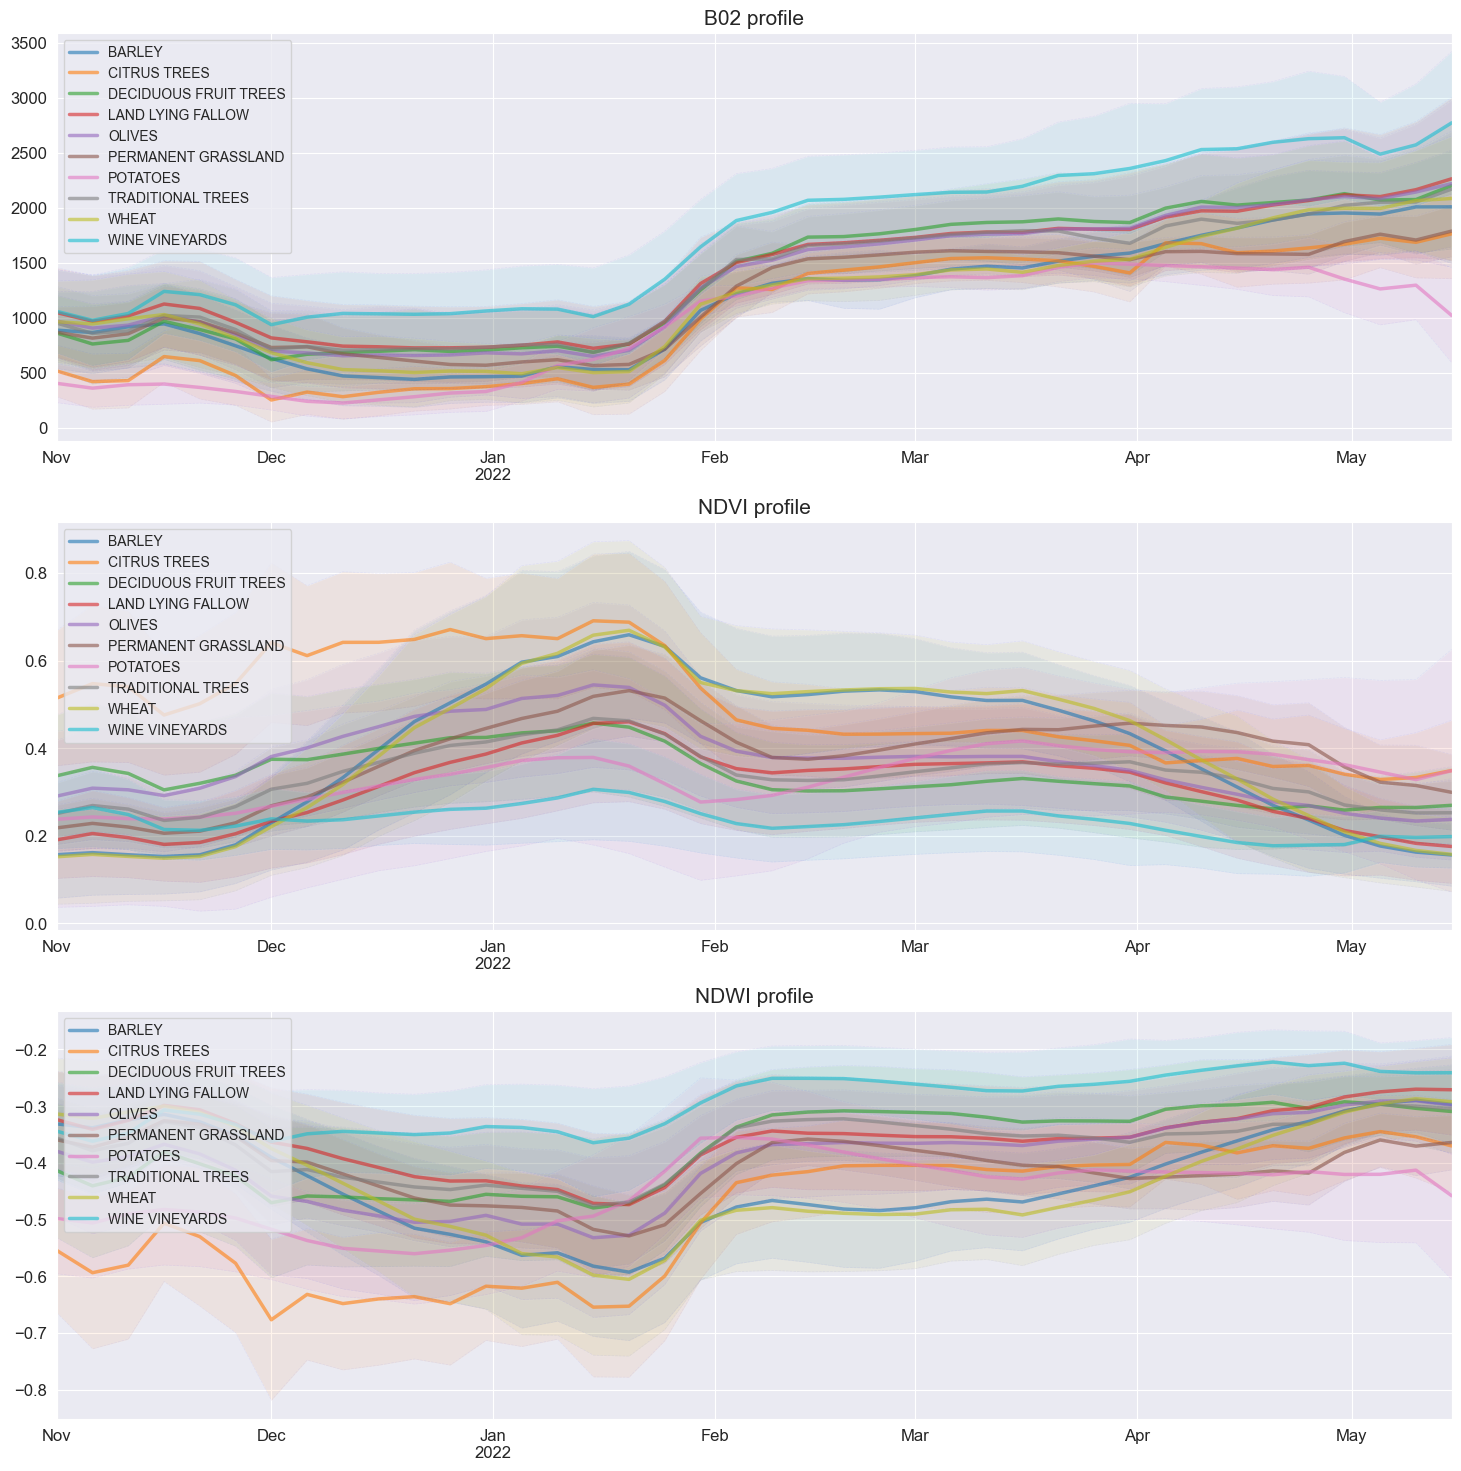

In [21]:
bands_to_visualize = ['B02','NDVI','NDWI']

fig,axes = plt.subplots(len(bands_to_visualize),1,figsize=(18,18))


for n,ax in enumerate(axes):

    mean_band = df_sentinel.iloc[:,1:].groupby('FIELD_ID').mean().filter(regex=bands_to_visualize[n],axis=1)
    mean_band['CROP_NAME'] = mean_band.index.map(id_to_name)
    mean_band = mean_band[mean_band.CROP_NAME!='TEST'].reset_index(drop=True)

    for code in sorted(mean_band['CROP_NAME'].value_counts().index):

        band_case = mean_band[mean_band.CROP_NAME==code].iloc[:,:-1].copy()
        band_case.columns = [pd.to_datetime(x) for x in dates]

        band_case.mean().plot(label=code,lw=2.5,alpha=0.6,ax=ax)
        lower_bound = band_case.mean()-band_case.std()
        upper_bound = band_case.mean()+band_case.std()
        lower_bound.plot(label='',lw=0.5,ls='--',color='b',alpha=0.05,legend=False,ax=ax)
        upper_bound.plot(label='',lw=0.5,ls='--',color='b',alpha=0.05,ax=ax)
        ax.fill_between(x=lower_bound.index, y1=lower_bound, y2 = upper_bound, alpha=0.08,
                        cmap=plt.cm.get_cmap("winter"))
        ax.set_title('{} profile'.format(bands_to_visualize[n]),fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.grid('--')
        ax.legend(loc='upper left',fontsize=10)

plt.show()

In [22]:
## Feature space pixels aggragation by field

X_train = df_sentinel[df_sentinel['FIELD_ID'].isin(df_meta[df_meta['DATASET']=='TRAIN']['FIELD_ID'])].iloc[:,1:].groupby('FIELD_ID').mean().values
print(X_train.shape)


ids_train = df_sentinel[df_sentinel['FIELD_ID'].isin(df_meta[df_meta['DATASET']=='TRAIN']['FIELD_ID'])].iloc[:,1:].groupby('FIELD_ID').mean().index
print(ids_train.shape)

X_test = df_sentinel[df_sentinel['FIELD_ID'].isin(df_meta[df_meta['DATASET']=='TEST']['FIELD_ID'])].iloc[:,1:].groupby('FIELD_ID').mean().values
print(X_test.shape)

ids_test = df_sentinel[df_sentinel['FIELD_ID'].isin(df_meta[df_meta['DATASET']=='TEST']['FIELD_ID'])].iloc[:,1:].groupby('FIELD_ID').mean().index
print(ids_test.shape)

y_train = df_meta[df_meta['DATASET']=='TRAIN']['CROP_CODE'].values
print(y_train.shape)

(2565, 600)
(2565,)
(1712, 600)
(1712,)
(2565,)


### Random Forest Benchmark

In [23]:
%%time
## Model Fit
clf = RandomForestClassifier(n_estimators=200,random_state=1234)
clf.fit(X_train,y_train)

CPU times: total: 15.6 s
Wall time: 16 s


RandomForestClassifier(n_estimators=200, random_state=1234)

In [24]:
## Results Predictions
y_test = clf.predict(X_test)
prob_test = clf.predict_proba(X_test).max(axis=1)

In [25]:
df_results = pd.DataFrame()
df_results['FIELD_ID'] = ids_test
df_results['ID'] = df_results['FIELD_ID'].map(field_id_to_index)
df_results['CROP_CODE'] = y_test.astype(int)
df_results['CROP_NAME'] = df_results['CROP_CODE'].map(code_to_name)
df_results['CONFIDENCE'] = prob_test
print(df_results.shape)
df_results.head()

(1712, 5)


FIELD_ID  ID  CROP_CODE CROP_NAME  CONFIDENCE
0   01101-3103-/2-282-372-11-74-1   9          2    BARLEY       0.565
1  01187-3104-/2-280-377-05-261-1  10          2    BARLEY       0.480
2  01225-3100-/2-291-375-07-153-1  11          5    OLIVES       0.345
3  01309-3110-/2-279-381-03-119-1  13          2    BARLEY       0.655
4  01339-3105-/2-280-379-12-286-1  17          2    BARLEY       0.565

#### Street-Level Photos for results explanation

In [27]:
street_level_meta = pd.read_csv('./nasa_data/meta/cyrpus_2022_street_level_meta.csv')
print(street_level_meta.shape)
street_level_meta.head()

(25715, 11)


PHOTO_ID                        FIELD_ID          CAPTURED_AT  \
0  550954009799519  01014-3101-/2-288-375-11-473-1  2022-05-31 10:16:00   
1  163131462849398  01014-3101-/2-288-375-11-473-1  2022-05-31 10:16:02   
2  808899540093076  01014-3101-/2-288-375-11-507-1  2022-05-31 10:15:54   
3  574767340699898  01014-3101-/2-288-375-11-507-1  2022-05-31 10:15:52   
4  690113718760723  01014-3101-/2-288-375-11-507-1  2022-05-31 10:15:57   

   COMPASS_ANGLE  COMPUTED_COMPASS_ANGLE  \
0            0.0                     0.0   
1            0.0                     0.0   
2            0.0                     0.0   
3            0.0                     0.0   
4            0.0                     0.0   

                                   COMPUTED_GEOMETRY  \
0  {'type': 'Point', 'coordinates': [33.973642, 3...   
1  {'type': 'Point', 'coordinates': [33.973441, 3...   
2  {'type': 'Point', 'coordinates': [33.974178, 3...   
3  {'type': 'Point', 'coordinates': [33.97435, 35...   
4  {'type': 'Point', 'coordinates': [33.974002, 3...   

                                      THUMB_1024_URL  \
0  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
1  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
2  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
3  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
4  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   

                                      THUMB_2048_URL  \
0  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
1  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
2  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
3  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   
4  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   

                                  THUMB_ORIGINAL_URL  WIDTH  HEIGHT  
0  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   2560    1440  
1  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   2560    1440  
2  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   2560    1440  
3  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   2560    1440  
4  https://scontent-lhr8-1.xx.fbcdn.net/m1/v/t6/A...   2560    1440

Predicted Crop: BARLEY



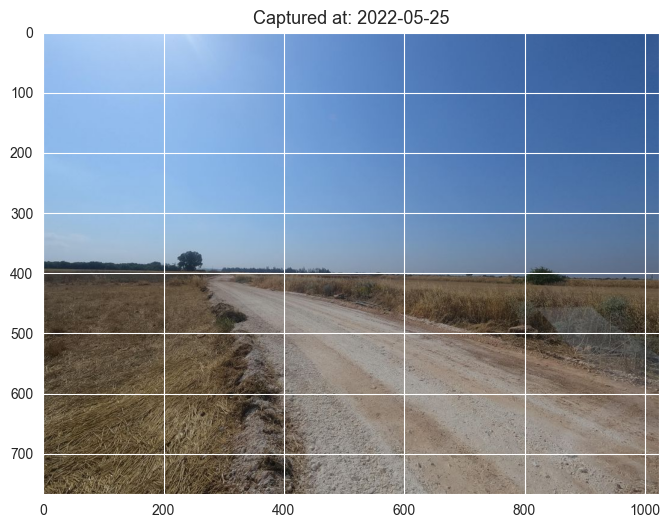

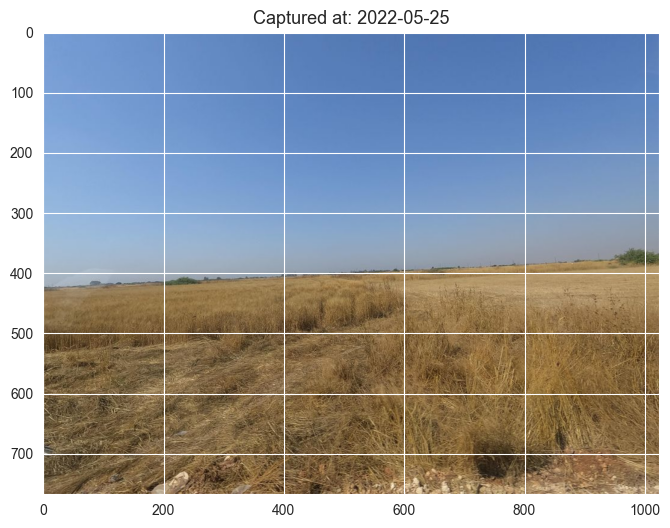

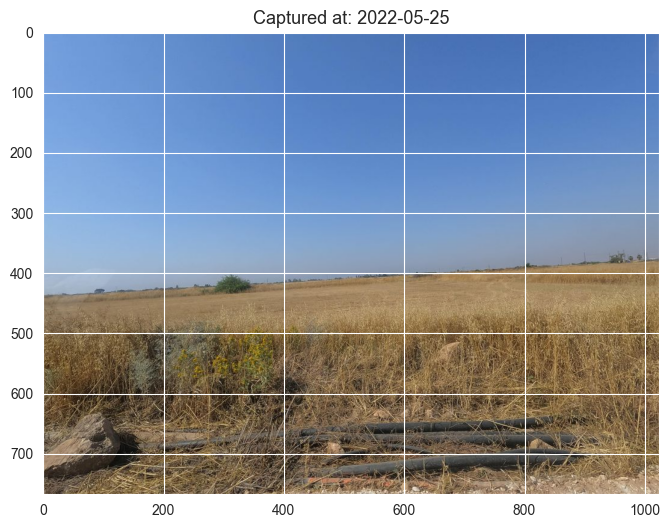

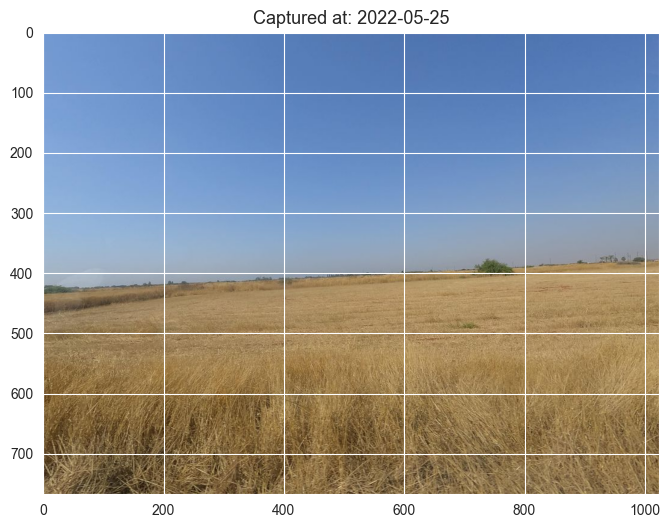

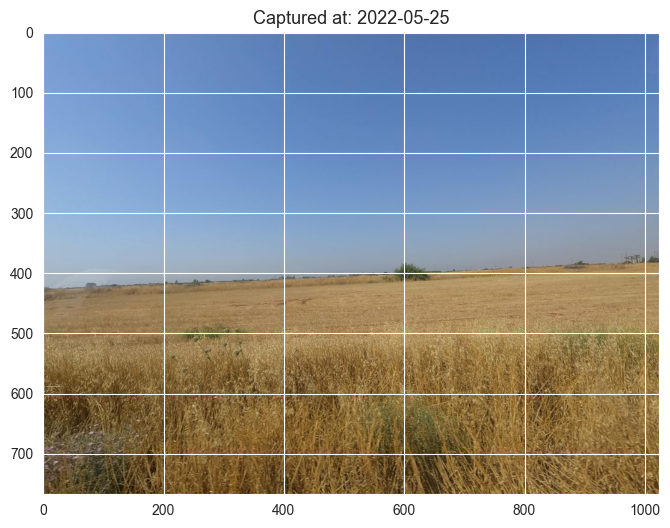

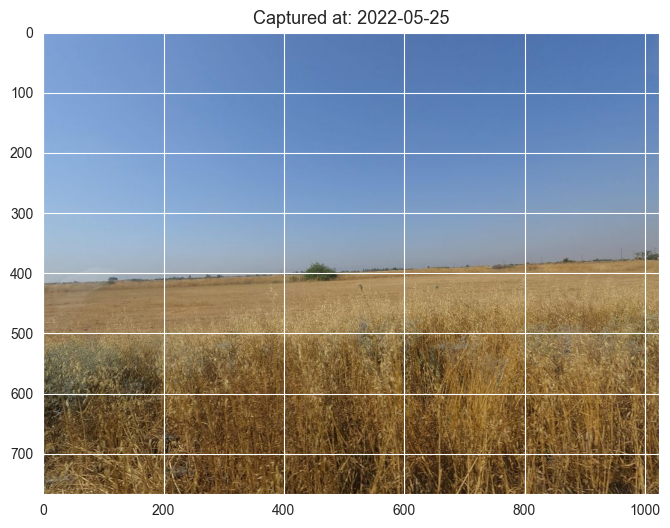

In [28]:
sample_id = 13
sample_pred = df_results[df_results['ID']==sample_id]['CROP_NAME'].values[0]
print('Predicted Crop: {}'.format(sample_pred))
print()


imgs = street_level_meta[street_level_meta['FIELD_ID']==df_results[df_results['ID']==sample_id]['FIELD_ID'].values[0]]

for im,date in imgs[['PHOTO_ID','CAPTURED_AT']].values:
    path = './nasa_data/street_level/{}.jpg'.format(im)
    img = mpimg.imread(path)
    plt.figure(figsize=(16,6))
    plt.title('Captured at: {}'.format(date.split(' ')[0]),size=13)
    plt.imshow(img)

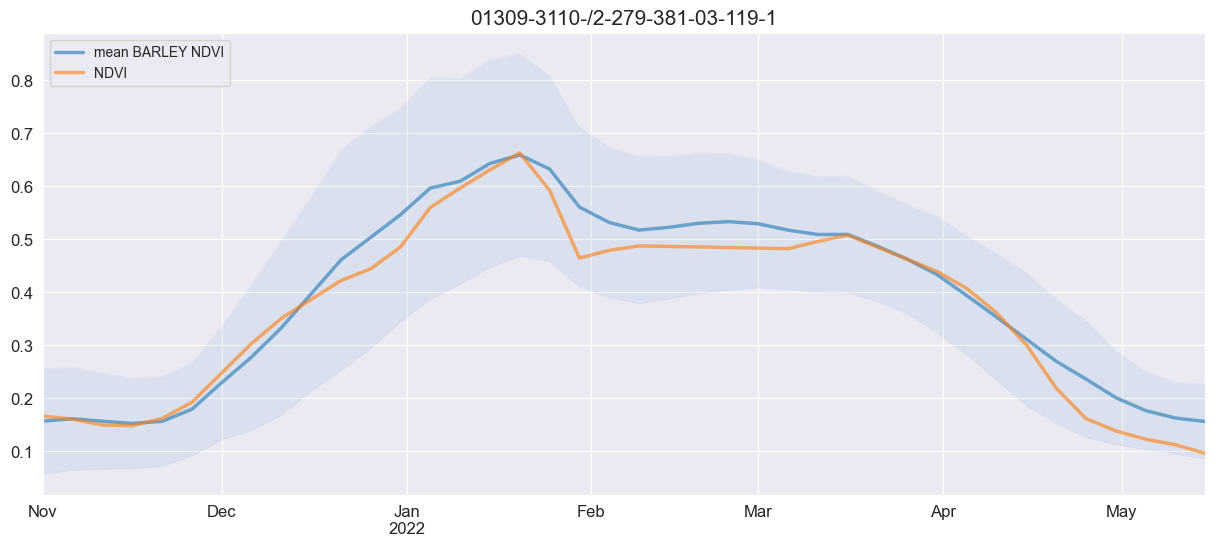

In [29]:
## Average behaviour of the predicted crop vs current instance

mean_ndvi = df_sentinel.iloc[:,1:].groupby('FIELD_ID').mean().filter(regex='NDVI',axis=1)
mean_ndvi['CROP_NAME'] = mean_ndvi.index.map(id_to_name)

fig,ax = plt.subplots(figsize=(15,6))

ndvi_case = mean_ndvi[mean_ndvi.CROP_NAME==sample_pred].iloc[:,:-1].copy()
ndvi_case.columns = [pd.to_datetime(x) for x in dates]
ndvi_case.mean().plot(label='mean {} NDVI'.format(sample_pred),lw=2.5,alpha=0.6,ax=ax)
lower_bound = ndvi_case.mean()-ndvi_case.std()
upper_bound = ndvi_case.mean()+ndvi_case.std()
lower_bound.plot(label='',lw=0.5,ls='--',color='b',alpha=0.05,legend=False,ax=ax)
upper_bound.plot(label='',lw=0.5,ls='--',color='b',alpha=0.05,ax=ax)
ax.fill_between(x=lower_bound.index, y1=lower_bound, y2 = upper_bound, alpha=0.08,
                        cmap=plt.cm.get_cmap("winter"))

sample_case = mean_ndvi.loc[index_to_field_id[sample_id]].iloc[:-1].copy()
sample_case.index = [pd.to_datetime(x) for x in dates]
sample_case.plot(label='NDVI',lw=2.5,alpha=0.6,ax=ax)

ax.set_title('{}'.format(index_to_field_id[sample_id]),fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid('--')
ax.legend(loc='upper left',fontsize=10)
plt.show()


## Model Training

### Unleash the Power of Data Fusion - Ideas for Your Implementation


While the initial implementation served as a baseline, it's time to elevate your approach and unleash the full potential of data fusion for accurate crop classification in Cyprus. Here are some exciting ideas to inspire your implementation:

* **Data Preprocessing and Feature Selection**: Dive into the data preprocessing phase with a focus on refining the dataset. Explore techniques to handle missing values, noise, and outliers. Consider feature selection methods to extract the most informative attributes for robust modeling.

* **Advanced Indices**: Go beyond the standard bands and create meaningful vegetation indices like the Normalized Difference Vegetation Index (NDVI), Normalized Difference Water Index (NDWI), and the Soil-Adjusted Vegetation Index (SAVI). These indices can provide deeper insights into crop health and environmental conditions.

* **Sophisticated Machine Learning Models**: Level up your machine learning models by exploring advanced algorithms such as Gradient Boosting, Support Vector Machines, or deep learning techniques like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs). These models can capture complex patterns in the data and improve classification accuracy.

* **Street-Level Data Fusion**: Embrace the power of computer vision and deep learning to incorporate street-level data into your decision-making process. By seamlessly integrating street-level imagery, you can enhance the accuracy and granularity of your crop classification results. Consider techniques like object detection, semantic segmentation, and image captioning to extract valuable information.

* **Ensemble Methods**: Experiment with ensemble techniques like Random Forest, AdaBoost, or stacking to combine the strengths of multiple models. Ensemble methods often lead to superior predictive performance by reducing overfitting and increasing model robustness.

* **Hyperparameter Tuning**: Fine-tune your models by exploring various hyperparameters. Use techniques like grid search or Bayesian optimization to identify the optimal set of hyperparameters that maximize your classification performance.

* **External data sources**: Explore the option of using additional data sources , enhancing the quality of results. Take into accound parcel geometries to access and process external data. Make sure though, on the meticulous documentation and the description of the process followed or the citation of any supplementary data source.

* **Explainability**: Provide insights into your model's decision-making process by incorporating interpretability techniques like SHAP (SHapley Additive exPlanations) values or LIME (Local Interpretable Model-agnostic Explanations). Explainable AI is crucial, especially in agriculture, where actionable insights are vital.

By embracing these ideas and pushing the boundaries of innovation, you'll not only advance crop classification accuracy but also contribute to the broader goal of sustainable agriculture in Cyprus. Your efforts will empower farmers with valuable information, optimize resource allocation, and ultimately pave the way for a more sustainable and prosperous future. Best of luck!


In [30]:
image_dir = "./nasa_data/street_level"
csv_path = "./nasa_data/fs_sentinel_cyprus_2022_buffer5_interp.csv"
meta_csv_path = "./nasa_data/meta/cyprus_2022_meta.csv"
street_level_meta_path = "./nasa_data/meta/cyrpus_2022_street_level_meta.csv"

In [31]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import warnings
import re
import glob

warnings.filterwarnings('ignore')

# Define the Hybrid Model with ResNet50
class PretrainedHybridModel(nn.Module):
    def __init__(self, num_classes, lstm_hidden_dim=256, num_features=5, time_steps=12):
        super(PretrainedHybridModel, self).__init__()

        # CNN Branch (ResNet50)
        self.cnn = self._get_modified_resnet(num_input_channels=4)
        self.cnn_output_dim = 2048
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Time Series Branch
        self.time_cnn = nn.Sequential(
            nn.Conv1d(num_features, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
        )

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=128, nhead=4, dim_feedforward=512, dropout=0.1, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=2)

        # LSTM
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=lstm_hidden_dim,
            num_layers=2,
            batch_first=True,
            dropout=0.2,
            bidirectional=True
        )
        self.ts_output_dim = lstm_hidden_dim * 2

        # Attention Mechanism
        self.attention = nn.MultiheadAttention(
            embed_dim=self.ts_output_dim,
            num_heads=4,
            batch_first=True
        )

        # Feature Fusion
        self.fusion = nn.Sequential(
            nn.Linear(self.cnn_output_dim + self.ts_output_dim, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def _get_modified_resnet(self, num_input_channels=4):
        resnet = models.resnet50(weights='IMAGENET1K_V1')
        original_conv = resnet.conv1
        resnet.conv1 = nn.Conv2d(
            num_input_channels, 64,
            kernel_size=7, stride=2,
            padding=3, bias=False
        )
        with torch.no_grad():
            resnet.conv1.weight[:, :3] = original_conv.weight
            if num_input_channels > 3:
                for i in range(3, num_input_channels):
                    resnet.conv1.weight[:, i] = original_conv.weight.mean(dim=1)
        modules = list(resnet.children())[:-2]
        return nn.Sequential(*modules)

    def forward(self, image, time_series):
        # CNN Branch
        cnn_features = self.cnn(image)
        cnn_features = self.adaptive_pool(cnn_features)
        cnn_features = cnn_features.view(image.size(0), -1)

        # Time Series Branch
        ts_features = time_series.transpose(1, 2)
        ts_features = self.time_cnn(ts_features)
        ts_features = ts_features.transpose(1, 2)

        # Transformer
        ts_features = self.transformer_encoder(ts_features)

        # LSTM
        lstm_out, _ = self.lstm(ts_features)

        # Attention
        attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)

        # Temporal Pooling
        ts_max = torch.max(attn_out, dim=1)[0]
        ts_avg = torch.mean(attn_out, dim=1)
        ts_features = torch.cat([ts_max, ts_avg], dim=1)
        ts_features = ts_features[:, :self.ts_output_dim]

        # Feature Fusion
        fused = torch.cat([cnn_features, ts_features], dim=1)
        fused = self.fusion(fused)

        # Classification
        output = self.classifier(fused)
        return output


### Dataset Functions

In [32]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from PIL import Image
import re

In [33]:
class CropVisionDataset(Dataset):
    def __init__(self, image_dir, csv_path, meta_csv_path, street_level_meta_path, transform=None, include_null_labels=False):
        self.image_dir = image_dir
        self.csv_path = csv_path
        self.meta_csv_path = meta_csv_path
        self.street_level_meta_path = street_level_meta_path
        self.transform = transform
        self.include_null_labels = include_null_labels

        # Define FIELD_ID sanitization function
        def sanitize_field_id(fid):
            return re.sub(r'[^a-zA-Z0-9]', '', str(fid)).lower()

        # Load metadata and handle NULL CROP_NAMEs
        meta = pd.read_csv(meta_csv_path)
        if include_null_labels:
            meta_with_labels = meta.dropna(subset=['CROP_NAME'])
            meta_null_labels = meta[meta['CROP_NAME'].isna()]
            print(f"Found {len(meta_null_labels)} entries with NULL CROP_NAME labels (potential test data)")
            meta_null_labels['CROP_NAME'] = 'NULL'
            meta = pd.concat([meta_with_labels, meta_null_labels])
        else:
            meta = meta.dropna(subset=['CROP_NAME'])

        meta['CROP_NAME'] = meta['CROP_NAME'].astype(str)
        meta['FIELD_ID_sanitized'] = meta['FIELD_ID'].apply(sanitize_field_id)
        meta_field_ids_sanitized = set(meta['FIELD_ID_sanitized'])

        ts_data = pd.read_csv(csv_path)
        ts_data['FIELD_ID_sanitized'] = ts_data['FIELD_ID'].apply(sanitize_field_id)
        ts_field_ids_sanitized = set(ts_data['FIELD_ID_sanitized'])

        # Find common FIELD_IDs
        common_field_ids_sanitized = meta_field_ids_sanitized.intersection(ts_field_ids_sanitized)
        print(f"Found {len(common_field_ids_sanitized)} common FIELD_IDs between meta and time series data.")

        if not common_field_ids_sanitized:
            raise ValueError("No common FIELD_IDs found between meta and time series data.")

        self.meta = meta[meta['FIELD_ID_sanitized'].isin(common_field_ids_sanitized)]
        self.labels = dict(zip(self.meta['FIELD_ID_sanitized'], self.meta['CROP_NAME']))
        all_field_ids_sanitized = self.meta['FIELD_ID_sanitized'].tolist()
        all_field_ids = self.meta['FIELD_ID'].tolist()

        # Create label mappings
        self.crop_types = sorted(set([label for label in self.labels.values() if label != 'NULL']))
        if include_null_labels:
            self.crop_types.append('NULL')
        self.label_map = {crop: idx for idx, crop in enumerate(self.crop_types)}
        self.idx_to_crop = {idx: crop for crop, idx in self.label_map.items()}

        # Load street-level metadata for image paths
        street_level_meta = pd.read_csv(street_level_meta_path)
        street_level_meta['FIELD_ID_sanitized'] = street_level_meta['FIELD_ID'].apply(sanitize_field_id)
        street_level_meta = street_level_meta[street_level_meta['FIELD_ID_sanitized'].isin(common_field_ids_sanitized)]
        street_level_meta['PHOTO_ID'] = street_level_meta['PHOTO_ID'].astype(str)
        street_level_meta['PHOTO_ID'] = street_level_meta['PHOTO_ID'].apply(
            lambda x: os.path.join(image_dir, x + '.jpg') if not os.path.isabs(x) else x
        )
        self.image_paths_dict = street_level_meta.groupby('FIELD_ID_sanitized')['PHOTO_ID'].apply(list).to_dict()

        # Filter FIELD_IDs with available images
        valid_field_ids_sanitized = [
            fid for fid in all_field_ids_sanitized
            if fid in self.image_paths_dict and len(self.image_paths_dict[fid]) > 0
        ]
        print(f"Found {len(valid_field_ids_sanitized)} FIELD_IDs with images.")

        sanitized_to_original = dict(zip(self.meta['FIELD_ID_sanitized'], self.meta['FIELD_ID']))
        self.field_ids_sanitized = valid_field_ids_sanitized
        self.field_ids = [sanitized_to_original[fid] for fid in self.field_ids_sanitized]
        self.labels = {fid: self.labels[fid] for fid in self.field_ids_sanitized if fid in self.labels}

        # Filter and deduplicate time series
        self.ts_data = ts_data[ts_data['FIELD_ID_sanitized'].isin(self.field_ids_sanitized)]
        self.ts_data = self.ts_data.groupby('FIELD_ID_sanitized').first().reset_index()
        print(f"Time series data contains {len(self.ts_data)} rows after deduplication.")

        if 'FIELD_ID' not in self.ts_data.columns:
            raise ValueError("Column 'FIELD_ID' not found in time series data.")

        # Extract date-feature columns
        pattern = r'(\d{4}-\d{2}-\d{2})_(B\d+|NDVI)'
        date_feature_cols = [col for col in self.ts_data.columns if re.match(pattern, col)]

        if not date_feature_cols:
            print(f"Available columns: {self.ts_data.columns[:10]}...")
            raise ValueError("No columns matching the pattern 'date_(Bband|NDVI)' found in time series data.")

        self.dates = sorted(set(re.match(pattern, col).group(1) for col in date_feature_cols))
        self.features = sorted(set(re.match(pattern, col).group(2) for col in date_feature_cols))
        self.time_steps = len(self.dates)
        self.num_features = len(self.features)
        self.time_series_cols = [f"{date}_{feature}" for date in self.dates for feature in self.features]

        missing_cols = set(self.time_series_cols) - set(self.ts_data.columns)
        if missing_cols:
            print(f"Warning: Missing {len(missing_cols)} columns. First few: {list(missing_cols)[:5]}")
            self.time_series_cols = [col for col in self.time_series_cols if col in self.ts_data.columns]
            if not self.time_series_cols:
                raise ValueError("No valid time series columns found after filtering.")

            # Recompute features/dates
            avail_dates = set()
            avail_features = set()
            for col in self.time_series_cols:
                match = re.match(pattern, col)
                if match:
                    avail_dates.add(match.group(1))
                    avail_features.add(match.group(2))
            self.dates = sorted(avail_dates)
            self.features = sorted(avail_features)
            self.time_steps = len(self.dates)
            self.num_features = len(self.features)

        valid_field_ids_sanitized = set(self.ts_data['FIELD_ID_sanitized'].unique()).intersection(self.field_ids_sanitized)
        self.field_ids_sanitized = [fid for fid in valid_field_ids_sanitized if fid in self.labels]
        self.field_ids = [sanitized_to_original[fid] for fid in self.field_ids_sanitized]
        self.labels = {fid: self.labels[fid] for fid in self.field_ids_sanitized}
        if not self.field_ids:
            raise ValueError("No fields found with both metadata, time series data, images, and labels.")

        print(f"Detected time-series columns: {self.time_series_cols}")
        print(f"Detected time steps: {self.time_steps}")
        print(f"Detected features: {self.num_features} ({self.features})")
        print(f"Valid field IDs count: {len(self.field_ids)}")


    def __len__(self):
        return len(self.field_ids)

    def __getitem__(self, idx):
        field_id = self.field_ids[idx]
        field_id_sanitized = re.sub(r'[^a-zA-Z0-9]', '', str(field_id)).lower()

        # Load image
        image_paths = self.image_paths_dict.get(field_id_sanitized, [])
        if not image_paths:
            print(f"No image found for FIELD_ID {field_id}")
            image = torch.zeros((4, 224, 224), dtype=torch.float32)
        else:
            image_path = image_paths[0]  # Select first image
            try:
                image = Image.open(image_path).convert('RGBA')
                if self.transform:
                    image = self.transform(image)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
                image = torch.zeros((4, 224, 224), dtype=torch.float32)

        # Load time series
        field_data = self.ts_data[self.ts_data['FIELD_ID_sanitized'] == field_id_sanitized]
        if len(field_data) != 1:
            raise ValueError(f"Expected one row for FIELD_ID {field_id}, got {len(field_data)}")

        row = field_data.iloc[0]
        time_series = torch.zeros((self.time_steps, self.num_features), dtype=torch.float32)
        for t, date in enumerate(self.dates):
            for f, feature in enumerate(self.features):
                col_name = f"{date}_{feature}"
                if col_name in self.time_series_cols:
                    try:
                        time_series[t, f] = row[col_name]
                    except Exception as e:
                        print(f"Error accessing {col_name}: {e}")

        # Load label
        label = self.label_map[self.labels[field_id_sanitized]]

        return image, time_series, label


In [34]:
# Plot Training History
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history['train_acc'], label='Train Accuracy')
    ax2.plot(history['val_acc'], label='Validation Accuracy')
    ax2.plot(history['train_f1'], label='Train F1 Score')
    ax2.plot(history['val_f1'], label='Validation F1 Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Score')
    ax2.set_title('Training and Validation Metrics')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()


**Stratified sampling applied wit focal loss**

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm # Import tqdm

# Define Focal Loss for class imbalance
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        focal_loss = ((1 - pt) ** self.gamma) * BCE_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            focal_loss = alpha_t * focal_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        return focal_loss.sum() if self.reduction == 'sum' else focal_loss


### Model Training

In [36]:
# Training function with F1 score tracking
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, scheduler):
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': [],
        'train_f1': [],
        'val_f1': []
    }

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_preds = []
        train_targets = []

        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 15)

        # Progress bar for training
        train_loop = tqdm(train_loader, desc="Training")
        for data in train_loop:
            images, time_series, labels = data[0].to(device), data[1].to(device), data[2].to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images, time_series)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            train_preds.extend(predicted.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())

            # Update progress bar
            train_loop.set_postfix(loss=loss.item())

        # Calculate epoch statistics
        train_loss = train_loss / len(train_loader.sampler)
        train_acc = accuracy_score(train_targets, train_preds)
        train_f1 = f1_score(train_targets, train_preds, average='weighted', zero_division=0)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_targets = []

        # No gradients needed for validation
        with torch.no_grad():
            val_loop = tqdm(val_loader, desc="Validation")
            for data in val_loop:
                images, time_series, labels = data[0].to(device), data[1].to(device), data[2].to(device)

                # Forward pass
                outputs = model(images, time_series)
                loss = criterion(outputs, labels)

                # Statistics
                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

                # Update progress bar
                val_loop.set_postfix(loss=loss.item())

        # Calculate validation statistics
        val_loss = val_loss / len(val_loader.sampler)
        val_acc = accuracy_score(val_targets, val_preds)
        val_f1 = f1_score(val_targets, val_preds, average='weighted', zero_division=0)

        # Update learning rate scheduler
        scheduler.step(val_loss)

        # Store history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)

        # Print epoch results
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

        # Save checkpoint every 5 epochs
        if (epoch + 1) % 5 == 0:
            checkpoint_path = f"checkpoint_epoch_{epoch+1}.pth"
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'train_loss': train_loss,
                'val_loss': val_loss,
            }, checkpoint_path)
            print(f"Checkpoint saved: {checkpoint_path}")

    return model, history

Using device: cuda
Loading training dataset...
Found 2565 common FIELD_IDs between meta and time series data.
Found 2565 FIELD_IDs with images.
Time series data contains 2565 rows after deduplication.
Detected time-series columns: ['2021-11-01_B02', '2021-11-01_B03', '2021-11-01_B04', '2021-11-01_B05', '2021-11-01_B06', '2021-11-01_B07', '2021-11-01_B08', '2021-11-01_B11', '2021-11-01_B12', '2021-11-01_NDVI', '2021-11-06_B02', '2021-11-06_B03', '2021-11-06_B04', '2021-11-06_B05', '2021-11-06_B06', '2021-11-06_B07', '2021-11-06_B08', '2021-11-06_B11', '2021-11-06_B12', '2021-11-06_NDVI', '2021-11-11_B02', '2021-11-11_B03', '2021-11-11_B04', '2021-11-11_B05', '2021-11-11_B06', '2021-11-11_B07', '2021-11-11_B08', '2021-11-11_B11', '2021-11-11_B12', '2021-11-11_NDVI', '2021-11-16_B02', '2021-11-16_B03', '2021-11-16_B04', '2021-11-16_B05', '2021-11-16_B06', '2021-11-16_B07', '2021-11-16_B08', '2021-11-16_B11', '2021-11-16_B12', '2021-11-16_NDVI', '2021-11-21_B02', '2021-11-21_B03', '2021-11

Validation: 100%|██████████| 17/17 [00:20<00:00,  1.23s/it, loss=0.000101]


Train Loss: 0.0261, Train Acc: 0.6404, Train F1: 0.6316
Val Loss: 0.0130, Val Acc: 0.6784, Val F1: 0.6670

Epoch 2/5
---------------


Validation: 100%|██████████| 17/17 [00:20<00:00,  1.22s/it, loss=0.0759] 


Train Loss: 0.0189, Train Acc: 0.6409, Train F1: 0.6293
Val Loss: 0.0124, Val Acc: 0.6628, Val F1: 0.6526

Epoch 3/5
---------------


Validation: 100%|██████████| 17/17 [00:20<00:00,  1.22s/it, loss=6.15e-5]


Train Loss: 0.0155, Train Acc: 0.6637, Train F1: 0.6553
Val Loss: 0.0128, Val Acc: 0.6842, Val F1: 0.6765

Epoch 4/5
---------------


Validation: 100%|██████████| 17/17 [00:20<00:00,  1.21s/it, loss=0.0028] 


Train Loss: 0.0141, Train Acc: 0.6677, Train F1: 0.6595
Val Loss: 0.0128, Val Acc: 0.7018, Val F1: 0.6943

Epoch 5/5
---------------


Validation: 100%|██████████| 17/17 [00:20<00:00,  1.22s/it, loss=0.0019] 


Train Loss: 0.0121, Train Acc: 0.6735, Train F1: 0.6647
Val Loss: 0.0139, Val Acc: 0.6725, Val F1: 0.6645
Checkpoint saved: checkpoint_epoch_5.pth


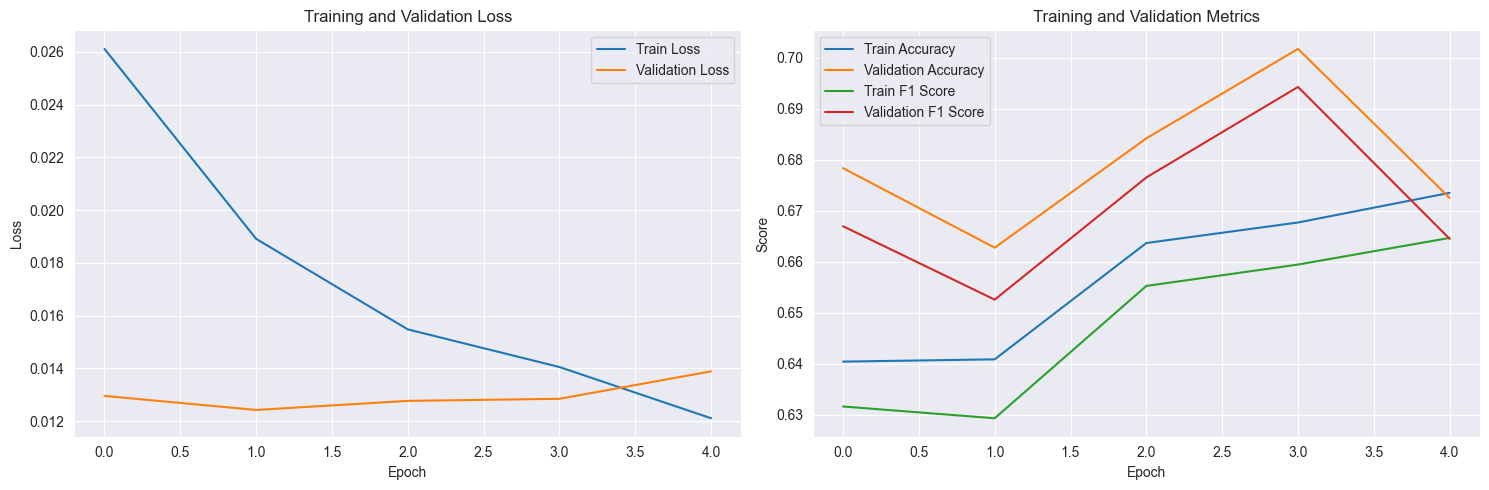

Model saved as hybrid_cnn_lstm_resnet50_model.pth


In [39]:
# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.5], std=[0.229, 0.224, 0.225, 0.5])
])

# Define test transform (no augmentations)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.5], std=[0.229, 0.224, 0.225, 0.5])
])

# Initialize Datasets
image_dir = "./nasa_data/street_level"
csv_path = "./nasa_data/fs_sentinel_cyprus_2022_buffer5_interp.csv"
meta_csv_path = "./nasa_data/meta/cyprus_2022_meta.csv"
street_level_meta_path = "./nasa_data/meta/cyrpus_2022_street_level_meta.csv"

print("Loading training dataset...")
train_dataset = CropVisionDataset(
    image_dir=image_dir,
    csv_path=csv_path,
    meta_csv_path=meta_csv_path,
    street_level_meta_path=street_level_meta_path,
    transform=transform,
    include_null_labels=False  # Exclude NULL labels for training
)
print(f"Training dataset size: {len(train_dataset)} samples")

print("Loading test dataset...")
test_dataset = CropVisionDataset(
    image_dir=image_dir,
    csv_path=csv_path,
    meta_csv_path=meta_csv_path,
    street_level_meta_path=street_level_meta_path,
    transform=test_transform,
    include_null_labels=True  # Include NULL labels for testing
)

# Filter test dataset to only include NULL labels
test_indices = [i for i in range(len(test_dataset))
               if test_dataset.labels[test_dataset.field_ids_sanitized[i]] == 'NULL']
print(f"Test dataset size: {len(test_indices)} samples with NULL labels")

# Check Class Balance in Training Data Before Duplication
label_counts = pd.Series([train_dataset.labels[fid] for fid in train_dataset.field_ids_sanitized]).value_counts()
print("Class distribution before duplication:")
print(label_counts)

# Create train/val split from labeled data
train_indices = list(range(len(train_dataset)))

# Stratified split for train and validation
stratify_labels = [train_dataset.labels[train_dataset.field_ids_sanitized[i]] for i in train_indices]
train_indices, val_indices = train_test_split(
    train_indices, train_size=0.8, random_state=42, stratify=stratify_labels
)

print(f"Train set: {len(train_indices)} samples")
print(f"Validation set: {len(val_indices)} samples")
print(f"Test set: {len(test_indices)} samples with NULL labels")

# Handle class imbalance - duplicate minority classes
# Duplicate samples for classes with fewer than threshold samples
minority_threshold = 100
target_count = 100

# Count current samples per class
train_labels = [train_dataset.labels[train_dataset.field_ids_sanitized[i]] for i in train_indices]
train_label_counts = pd.Series(train_labels).value_counts()

minority_classes = {label for label, count in train_label_counts.items()
                   if count < minority_threshold}

if minority_classes:
    print(f"Classes with fewer than {minority_threshold} samples in train set: {minority_classes}")

    # Track indices to duplicate
    indices_to_duplicate = []
    label_counts_dict = train_label_counts.to_dict()

    # Find samples to duplicate
    for label in minority_classes:
        current_count = label_counts_dict.get(label, 0)
        needed = max(0, target_count - current_count)
        if needed > 0:
            # Gather all indices for this class
            class_indices = [idx for idx in train_indices
                           if train_dataset.labels[train_dataset.field_ids_sanitized[idx]] == label]

            # Duplicate randomly with replacement
            duplicate_indices = np.random.choice(class_indices, size=needed, replace=True)
            indices_to_duplicate.extend(duplicate_indices)

    # Add duplicates to training set
    train_indices.extend(indices_to_duplicate)

    # Verify balanced dataset
    final_train_labels = [train_dataset.labels[train_dataset.field_ids_sanitized[i]] for i in train_indices]
    final_train_label_counts = pd.Series(final_train_labels).value_counts()
    print("Class distribution after duplication:")
    print(final_train_label_counts)

# Data Loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                         sampler=SubsetRandomSampler(train_indices), shuffle=False)
val_loader = DataLoader(train_dataset, batch_size=batch_size,
                       sampler=SubsetRandomSampler(val_indices), shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size,
                        sampler=SubsetRandomSampler(test_indices), shuffle=False)

# Verify data loader sizes
train_samples = sum(1 for _ in train_loader)
print(f"Train batches per epoch: {train_samples}")
val_samples = sum(1 for _ in val_loader)
print(f"Validation batches per epoch: {val_samples}")
test_samples = sum(1 for _ in test_loader)
print(f"Test batches: {test_samples}")

# Initialize Model
num_classes = len(train_dataset.crop_types)
time_steps = train_dataset.time_steps
num_features = train_dataset.num_features

print(f"Initializing model with {num_classes} classes, {time_steps} time steps, {num_features} features")

model = PretrainedHybridModel(
    num_classes=num_classes,
    lstm_hidden_dim=256,
    num_features=num_features,
    time_steps=time_steps
).to(device)

# Class Weights for Focal Loss
class_counts = pd.Series([train_dataset.labels[fid] for fid in train_dataset.field_ids_sanitized]).value_counts()
weights = 1.0 / torch.tensor([class_counts.get(c, 1) for c in train_dataset.crop_types], dtype=torch.float)
weights = weights / weights.sum()
criterion = FocalLoss(gamma=2.0, alpha=weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Load checkpoint
checkpoint = torch.load('checkpoint_epoch_20.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print(f"Loaded checkpoint from epoch: {checkpoint.get('epoch', 20)}")

# Train Model
num_epochs = 5  # Adjust as needed
print(f"Starting training for {num_epochs} epochs...")
model, history = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs, device, scheduler
)
plot_training_history(history)

# Save Model
model_path = "hybrid_cnn_lstm_resnet50_model.pth"
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'num_classes': num_classes,
    'time_steps': time_steps,
    'num_features': num_features,
    'crop_types': train_dataset.crop_types,
    'label_map': train_dataset.label_map,
}, model_path)
print(f"Model saved as {model_path}")

In [38]:
# New function to predict on test set with NULL labels
def predict_test_set(model, test_loader, test_dataset, device):
    model.eval()
    predictions = []
    field_ids = []

    with torch.no_grad():
        for batch_idx, (images, time_series, _) in enumerate(test_loader):
            # Get the actual indices from the sampler
            batch_indices = list(test_loader.sampler)[batch_idx * test_loader.batch_size:
                                                     (batch_idx + 1) * test_loader.batch_size]

            # Get field IDs for this batch
            batch_field_ids = [test_dataset.field_ids[i] for i in batch_indices]
            field_ids.extend(batch_field_ids)

            # Forward pass
            images = images.to(device)
            time_series = time_series.to(device)
            outputs = model(images, time_series)

            # Get predicted class indices
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())

    # Convert predictions to crop names
    pred_crop_names = [test_dataset.idx_to_crop[pred] for pred in predictions]

    # Create and save prediction dataframe
    results_df = pd.DataFrame({
        'FIELD_ID': field_ids,
        'PREDICTED_CROP': pred_crop_names
    })

    results_df.to_csv('test_predictions.csv', index=False)
    print(f"Test predictions saved to test_predictions.csv with {len(results_df)} entries")

# Predict on test set
print("Predicting on test set...")
predict_test_set(model, test_loader, test_dataset, device)

Predicting on test set...
Test predictions saved to test_predictions.csv with 1712 entries
